In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv('/Users/beata/Desktop/Python_project/NLP_Dataset.csv')
df

,ASIN,Product,Category,Price,URL,Stars,Reviews,NLP_Reviews,Embeddings,Summary,Sentiment,Confidence
0,‎B01JPOLKDW,Logitech M330 Silent Plus Wireless Mouse – Enj...,Accessories,S$25.99,https://www.amazon.sg/Logitech-M330-Silent-Wir...,4.6,"[""The media could not be loaded.\nIt's really ...",medium load quiet light trust logitech perfect...,[-2.81946249e-02 -9.57620069e-02 5.60252406e-...,This is M330. Perfect for people who want to u...,Negative,0.721312
1,‎B0B11LJ69K,Logitech MX Master 3S Performance Wireless Mou...,Accessories,S$148.73,https://www.amazon.sg/Logitech-MX-Master-3S-Pe...,4.8,"['Good investment...', 'The roller-wheel broke...",good investment rollerwheel break month feel n...,[-7.16446713e-02 -8.72731283e-02 1.76031480e-...,The roller-wheel broke within 3 months. You ca...,Positive,0.951462
2,‎B07Y9PMKV2,"Wireless Keyboard and Mouse,JOYACCESS 2.4G Erg...",Accessories,S$35.99,https://www.amazon.sg/Wireless-Keyboard-JOYACC...,4.2,['Quiet nice smooth to use. Worth it. Sleek mo...,quiet nice smooth use worth sleek modern desig...,[-5.05857542e-02 -7.25003555e-02 4.97577339e-...,The response is quick and there's hardly any n...,Positive,0.514924
3,‎B01MQ2A86A,Logitech M331 Silent Plus Wireless Mouse 2.4GH...,Accessories,S$23.90,https://www.amazon.sg/Logitech-Silent-Wireless...,4.5,['Amazing Amazon 1 day delivery !Product is as...,amazing amazon day delivery product usual logi...,[-5.76212779e-02 -4.09404784e-02 6.28341734e-...,Good quality not completely silent but there i...,Positive,0.989566
4,‎B09QXCWLNS,Logitech M650 L Signature Wireless Mouse Graph...,Accessories,S$42.83,https://www.amazon.sg/Logitech-Signature-Wirel...,4.5,['Delivery was on time well packed and great p...,delivery time pack great product hand large ve...,[-4.44779322e-02 -5.66297658e-02 4.11339700e-...,The Logitech Signature M650 L full size Wirele...,Positive,0.991165
...,...,...,...,...,...,...,...,...,...,...,...,...
3854,‎B01FRP252S,Kingston Digital 480GB SSDNow UV400 SATA 3 2.5...,Storage,S$284.01,https://www.amazon.sg/Kingston-Digital-SSDNow-...,4.7,"[""I did not want to spend a lot replacing a go...",want spend lot replace good laptop lack speed ...,[-8.28874409e-02 2.76797805e-02 -1.68551970e-...,The kit lets me download and use an Acronis so...,Positive,0.968377
3855,‎B01C2JJB0G,EMTEC 480GB X150 Power Plus 3D NAND 2.5” SATA ...,Storage,S$70.30,https://www.amazon.sg/EMTEC-480GB-Power-Intern...,4.6,"[""Typical SSD - very good value for this size ...",typical ssd good value size driveinstall like ...,[-7.79190138e-02 8.01656917e-02 1.54687651e-...,Tested temperature m under normal running cond...,Positive,0.990620
3856,‎B019SDO7FI,"Kingston Digital 128GB KC400 2.5"" SSD Combo Bu...",Storage,S$118.61,https://www.amazon.sg/Kingston-Digital-Bundle-...,4.5,"['That\'s what my laptop has become, in a runw...",laptop runway kingston kc ssdnow tb hard drive...,[ 1.43253170e-02 -2.58769616e-02 7.52137648e-...,Kingston KC400 SSDNow - 1 TB hard drive (SATA ...,Positive,0.964878
3857,‎B00LL4QUX0,Transcend Japan TS128GCFX600 Commercial and In...,Storage,S$174.47,https://www.amazon.sg/Transcend-TS128GCFX600-C...,4.2,"[""Having bought the new Canon 1Dx Mark 2 Camer...",having buy new canon dx mark camera lookout ex...,[-4.02819412e-03 -3.59248444e-02 1.53554289e-...,Canon 1Dx Mark 2 comes with a 64Gb Sandisk CFa...,Positive,0.956425


Product distribution by Category:

In [112]:
df2=df[['Category', 'Product']]
df2

,Category,Product
0,Accessories,Logitech M330 Silent Plus Wireless Mouse – Enj...
1,Accessories,Logitech MX Master 3S Performance Wireless Mou...
2,Accessories,"Wireless Keyboard and Mouse,JOYACCESS 2.4G Erg..."
3,Accessories,Logitech M331 Silent Plus Wireless Mouse 2.4GH...
4,Accessories,Logitech M650 L Signature Wireless Mouse Graph...
...,...,...
3854,Storage,Kingston Digital 480GB SSDNow UV400 SATA 3 2.5...
3855,Storage,EMTEC 480GB X150 Power Plus 3D NAND 2.5” SATA ...
3856,Storage,"Kingston Digital 128GB KC400 2.5"" SSD Combo Bu..."
3857,Storage,Transcend Japan TS128GCFX600 Commercial and In...


In [113]:
category_counts=df2.groupby('Category')['Product'].count().reset_index()

category_counts

,Category,Product
0,Accessories,252
1,Graphics Cards,570
2,Laptops,1304
3,Processors,162
4,RAM,154
5,Smartphones,404
6,Smartwatches,343
7,Storage,670


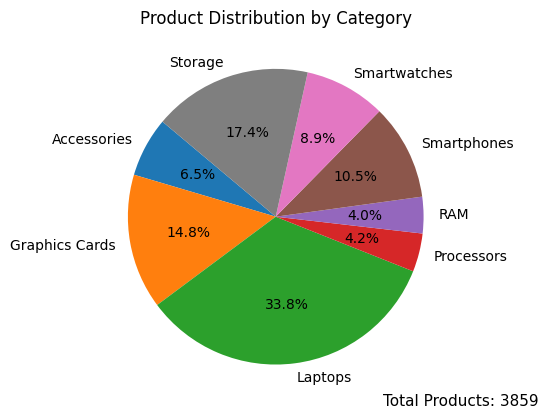

In [114]:
labels=category_counts['Category']
category_counts_data=category_counts['Product']

total_products = category_counts_data.sum()

plt.pie(category_counts_data, labels=labels, autopct='%.1f%%',startangle=140)
plt.title('Product Distribution by Category')
plt.text(1.0, 0.0, f'Total Products: {total_products}', horizontalalignment='center', verticalalignment='center', fontsize=11, transform=plt.gca().transAxes)

plt.show()

Star Rating Distribution & Average Rating by Category:

In [115]:
df3 = df[['Category', 'Stars']]
df3

,Category,Stars
0,Accessories,4.6
1,Accessories,4.8
2,Accessories,4.2
3,Accessories,4.5
4,Accessories,4.5
...,...,...
3854,Storage,4.7
3855,Storage,4.6
3856,Storage,4.5
3857,Storage,4.2


In [116]:
df3.groupby('Category').mean()

,Stars
Category,
Accessories,4.256746
Graphics Cards,4.297719
Laptops,4.143175
Processors,4.550617
RAM,4.637013
Smartphones,4.094307
Smartwatches,3.962099
Storage,4.385970


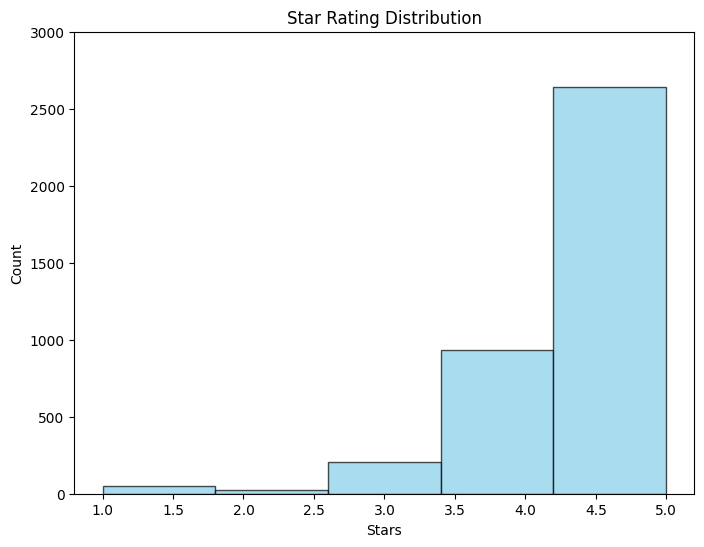

In [117]:
plt.figure(figsize=(8, 6))
plt.hist(df['Stars'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Star Rating Distribution')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.ylim(0,3000)

plt.show()

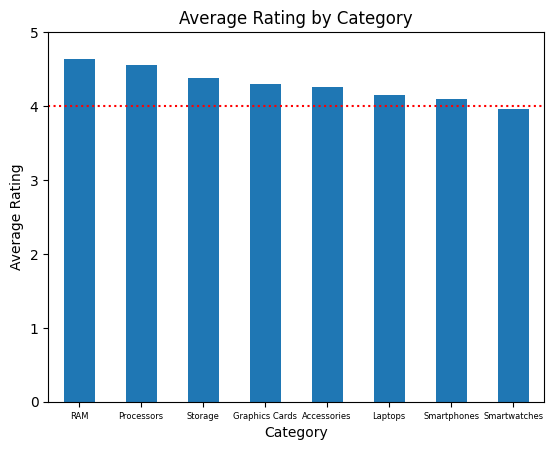

In [118]:
category_means = df3.groupby('Category')['Stars'].mean().reset_index()

category_means = category_means.sort_values(by='Stars', ascending=False)
category_means.set_index('Category', inplace=True)
ax = category_means.plot(kind='bar', legend=False)

plt.axhline(y=4, color='red', linestyle='dotted')

plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Rating by Category')

plt.xticks(rotation=0, fontsize=6)
plt.ylim(0,5)

plt.show()

Reviews Count vs. Product Count by Category

In [119]:
df4=df[['Category', 'Product', 'Reviews']]
df4

,Category,Product,Reviews
0,Accessories,Logitech M330 Silent Plus Wireless Mouse – Enj...,"[""The media could not be loaded.\nIt's really ..."
1,Accessories,Logitech MX Master 3S Performance Wireless Mou...,"['Good investment...', 'The roller-wheel broke..."
2,Accessories,"Wireless Keyboard and Mouse,JOYACCESS 2.4G Erg...",['Quiet nice smooth to use. Worth it. Sleek mo...
3,Accessories,Logitech M331 Silent Plus Wireless Mouse 2.4GH...,['Amazing Amazon 1 day delivery !Product is as...
4,Accessories,Logitech M650 L Signature Wireless Mouse Graph...,['Delivery was on time well packed and great p...
...,...,...,...
3854,Storage,Kingston Digital 480GB SSDNow UV400 SATA 3 2.5...,"[""I did not want to spend a lot replacing a go..."
3855,Storage,EMTEC 480GB X150 Power Plus 3D NAND 2.5” SATA ...,"[""Typical SSD - very good value for this size ..."
3856,Storage,"Kingston Digital 128GB KC400 2.5"" SSD Combo Bu...","['That\'s what my laptop has become, in a runw..."
3857,Storage,Transcend Japan TS128GCFX600 Commercial and In...,"[""Having bought the new Canon 1Dx Mark 2 Camer..."


In [120]:
import ast

def str_to_list(review_str):
    return ast.literal_eval(review_str)

df['Reviews'] = df['Reviews'].apply(str_to_list)

df['Reviews Sum Per Product'] = df['Reviews'].apply(lambda x: len(x))

print(type(df['Reviews'][0]))

for review in df['Reviews'][0]:
    print(review)

df[['Category', 'Product', 'Reviews Sum Per Product']]
df

<class 'list'>
The media could not be loaded.
It's really quiet, and it's not too light. Always trusting logitech. This is M330. Perfect for people who want to use in an enclosed space, maybe like library, or in court. Black is always nice too, and it doesn't have those cheap rubbery finishes. Moves well too, and responses way better than a lot of other mouse in its price range.
It indeed is less noisy (the click sound is much much softer than other normal mouse) but does not compromise the quality. the click accuracy is ok as well.
I use this mouse 10-12 hours a day, 5 days a week. Never have any issues. Also doesn't chew through batteries. Comfortable to hold. Great price point and product.
Affordable. For use with my MacBook. Also works with Windows on Parallels.
Bought a few other cheaper fake/clone mice which don't perform well - saw this on sale and grabbed one.You can get cheaper genuine Logitech mice (M121 $16 on sale, or the M221 w silent clicks) but this combines both key fea

,ASIN,Product,Category,Price,URL,Stars,Reviews,NLP_Reviews,Embeddings,Summary,Sentiment,Confidence,Reviews Sum Per Product
0,‎B01JPOLKDW,Logitech M330 Silent Plus Wireless Mouse – Enj...,Accessories,S$25.99,https://www.amazon.sg/Logitech-M330-Silent-Wir...,4.6,[The media could not be loaded.\nIt's really q...,medium load quiet light trust logitech perfect...,[-2.81946249e-02 -9.57620069e-02 5.60252406e-...,This is M330. Perfect for people who want to u...,Negative,0.721312,10
1,‎B0B11LJ69K,Logitech MX Master 3S Performance Wireless Mou...,Accessories,S$148.73,https://www.amazon.sg/Logitech-MX-Master-3S-Pe...,4.8,"[Good investment..., The roller-wheel broke wi...",good investment rollerwheel break month feel n...,[-7.16446713e-02 -8.72731283e-02 1.76031480e-...,The roller-wheel broke within 3 months. You ca...,Positive,0.951462,9
2,‎B07Y9PMKV2,"Wireless Keyboard and Mouse,JOYACCESS 2.4G Erg...",Accessories,S$35.99,https://www.amazon.sg/Wireless-Keyboard-JOYACC...,4.2,[Quiet nice smooth to use. Worth it. Sleek mod...,quiet nice smooth use worth sleek modern desig...,[-5.05857542e-02 -7.25003555e-02 4.97577339e-...,The response is quick and there's hardly any n...,Positive,0.514924,10
3,‎B01MQ2A86A,Logitech M331 Silent Plus Wireless Mouse 2.4GH...,Accessories,S$23.90,https://www.amazon.sg/Logitech-Silent-Wireless...,4.5,[Amazing Amazon 1 day delivery !Product is as ...,amazing amazon day delivery product usual logi...,[-5.76212779e-02 -4.09404784e-02 6.28341734e-...,Good quality not completely silent but there i...,Positive,0.989566,10
4,‎B09QXCWLNS,Logitech M650 L Signature Wireless Mouse Graph...,Accessories,S$42.83,https://www.amazon.sg/Logitech-Signature-Wirel...,4.5,[Delivery was on time well packed and great pr...,delivery time pack great product hand large ve...,[-4.44779322e-02 -5.66297658e-02 4.11339700e-...,The Logitech Signature M650 L full size Wirele...,Positive,0.991165,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,‎B01FRP252S,Kingston Digital 480GB SSDNow UV400 SATA 3 2.5...,Storage,S$284.01,https://www.amazon.sg/Kingston-Digital-SSDNow-...,4.7,[I did not want to spend a lot replacing a goo...,want spend lot replace good laptop lack speed ...,[-8.28874409e-02 2.76797805e-02 -1.68551970e-...,The kit lets me download and use an Acronis so...,Positive,0.968377,8
3855,‎B01C2JJB0G,EMTEC 480GB X150 Power Plus 3D NAND 2.5” SATA ...,Storage,S$70.30,https://www.amazon.sg/EMTEC-480GB-Power-Intern...,4.6,[Typical SSD - very good value for this size o...,typical ssd good value size driveinstall like ...,[-7.79190138e-02 8.01656917e-02 1.54687651e-...,Tested temperature m under normal running cond...,Positive,0.990620,5
3856,‎B019SDO7FI,"Kingston Digital 128GB KC400 2.5"" SSD Combo Bu...",Storage,S$118.61,https://www.amazon.sg/Kingston-Digital-Bundle-...,4.5,"[That's what my laptop has become, in a runway...",laptop runway kingston kc ssdnow tb hard drive...,[ 1.43253170e-02 -2.58769616e-02 7.52137648e-...,Kingston KC400 SSDNow - 1 TB hard drive (SATA ...,Positive,0.964878,5
3857,‎B00LL4QUX0,Transcend Japan TS128GCFX600 Commercial and In...,Storage,S$174.47,https://www.amazon.sg/Transcend-TS128GCFX600-C...,4.2,[Having bought the new Canon 1Dx Mark 2 Camera...,having buy new canon dx mark camera lookout ex...,[-4.02819412e-03 -3.59248444e-02 1.53554289e-...,Canon 1Dx Mark 2 comes with a 64Gb Sandisk CFa...,Positive,0.956425,8


In [121]:
category_sum = df.groupby('Category')['Reviews Sum Per Product'].sum().reset_index()

result_df = pd.merge(category_counts, category_sum, on='Category')

result_df.rename(columns={'Product': 'Product Count', 'Reviews Sum Per Product': 'Reviews Sum'}, inplace=True)

result_df


,Category,Product Count,Reviews Sum
0,Accessories,252,1856
1,Graphics Cards,570,3698
2,Laptops,1304,8402
3,Processors,162,1059
4,RAM,154,986
5,Smartphones,404,2710
6,Smartwatches,343,2378
7,Storage,670,4385


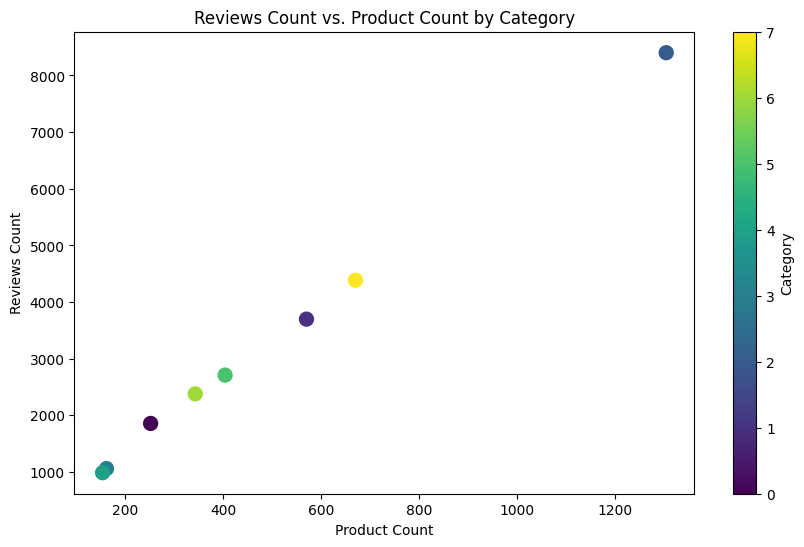

In [122]:
plt.figure(figsize=(10, 6))
plt.scatter(result_df['Product Count'], result_df['Reviews Sum'], c=result_df['Category'].astype('category').cat.codes, cmap='viridis', s=100)
plt.xlabel('Product Count')
plt.ylabel('Reviews Count')
plt.title('Reviews Count vs. Product Count by Category')
plt.colorbar(label='Category')

plt.show()

Confidence Interval Plot & Sentiment Distribution & Positive/ Negative Sentiment Confidence Level

In [123]:
df5=df[['Sentiment', 'Confidence']]
df5

,Sentiment,Confidence
0,Negative,0.721312
1,Positive,0.951462
2,Positive,0.514924
3,Positive,0.989566
4,Positive,0.991165
...,...,...
3854,Positive,0.968377
3855,Positive,0.990620
3856,Positive,0.964878
3857,Positive,0.956425


In [124]:
df5.groupby('Sentiment').mean()

,Confidence
Sentiment,
Negative,0.832879
Positive,0.954197


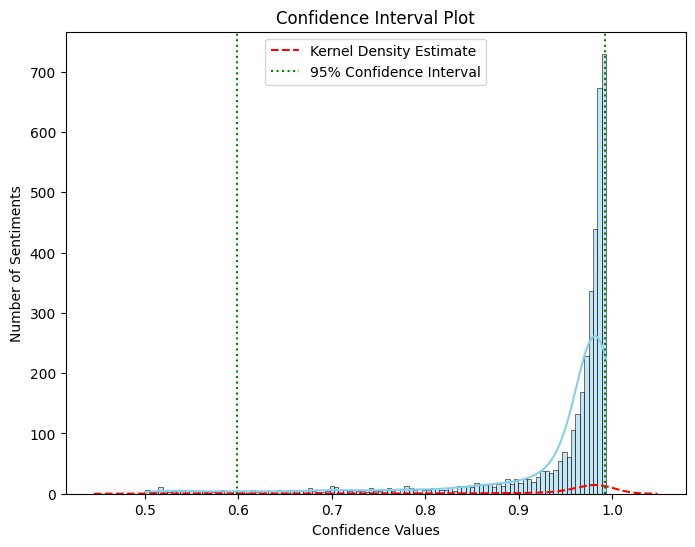

In [125]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Confidence'], kde=True, color='skyblue')
sns.kdeplot(df['Confidence'], color='red', linestyle='--', label='Kernel Density Estimate')

confidence_interval = np.percentile(df['Confidence'], [2.5, 97.5])
lower_bound, upper_bound = confidence_interval

# Add confidence interval lines to the plot
plt.axvline(lower_bound, color='green', linestyle=':', label='95% Confidence Interval')
plt.axvline(upper_bound, color='green', linestyle=':')

plt.xlabel('Confidence Values')
plt.ylabel('Number of Sentiments')
plt.title('Confidence Interval Plot')

plt.legend()

plt.show()

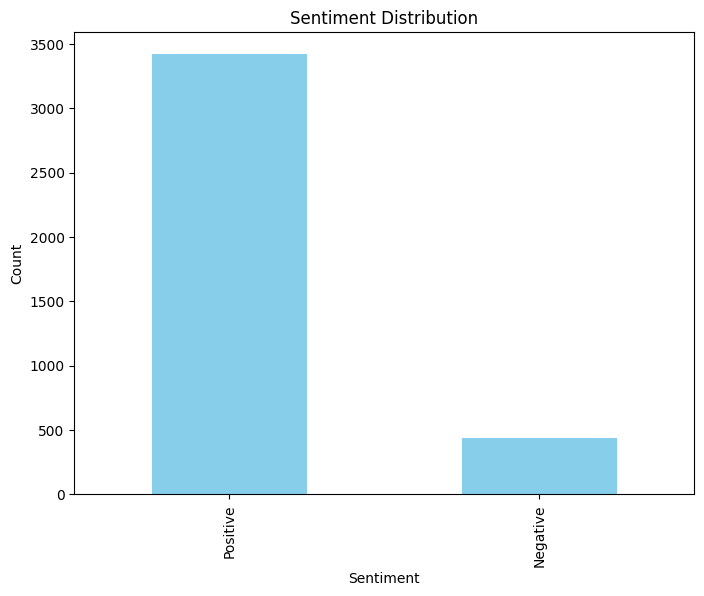

In [126]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.show()

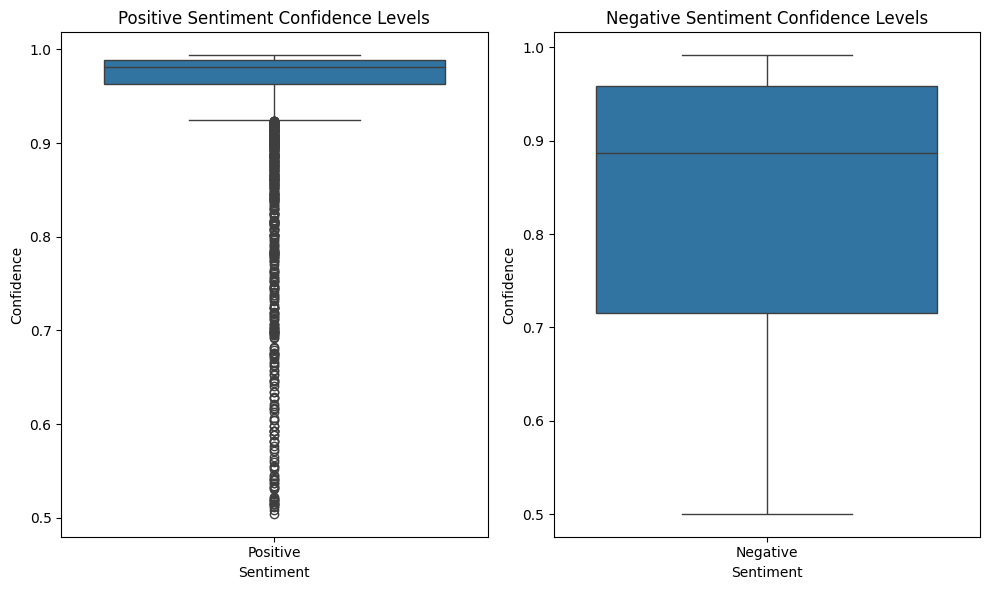

In [127]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Sentiment', y='Confidence', data=df5[df5['Sentiment'] == 'Positive'])
plt.title('Positive Sentiment Confidence Levels')
plt.xlabel('Sentiment')
plt.ylabel('Confidence')

plt.subplot(1, 2, 2)
sns.boxplot(x='Sentiment', y='Confidence', data=df5[df5['Sentiment'] == 'Negative'])
plt.title('Negative Sentiment Confidence Levels')
plt.xlabel('Sentiment')
plt.ylabel('Confidence')

plt.tight_layout()

plt.show()

Distribution of Word Counts in Reviews & Scatter Plot of Word Count vs. Review Rating

In [128]:
df6=df[['Stars', 'Reviews']]
df6

,Stars,Reviews
0,4.6,[The media could not be loaded.\nIt's really q...
1,4.8,"[Good investment..., The roller-wheel broke wi..."
2,4.2,[Quiet nice smooth to use. Worth it. Sleek mod...
3,4.5,[Amazing Amazon 1 day delivery !Product is as ...
4,4.5,[Delivery was on time well packed and great pr...
...,...,...
3854,4.7,[I did not want to spend a lot replacing a goo...
3855,4.6,[Typical SSD - very good value for this size o...
3856,4.5,"[That's what my laptop has become, in a runway..."
3857,4.2,[Having bought the new Canon 1Dx Mark 2 Camera...


In [129]:
df['Word Count'] = df['Reviews'].apply(lambda reviews: sum(len(review.split()) for review in reviews))

# Display the DataFrame with word count
df[['Stars', 'Reviews', 'Word Count']]

,Stars,Reviews,Word Count
0,4.6,[The media could not be loaded.\nIt's really q...,419
1,4.8,"[Good investment..., The roller-wheel broke wi...",739
2,4.2,[Quiet nice smooth to use. Worth it. Sleek mod...,1235
3,4.5,[Amazing Amazon 1 day delivery !Product is as ...,292
4,4.5,[Delivery was on time well packed and great pr...,741
...,...,...,...
3854,4.7,[I did not want to spend a lot replacing a goo...,2988
3855,4.6,[Typical SSD - very good value for this size o...,108
3856,4.5,"[That's what my laptop has become, in a runway...",1096
3857,4.2,[Having bought the new Canon 1Dx Mark 2 Camera...,1519


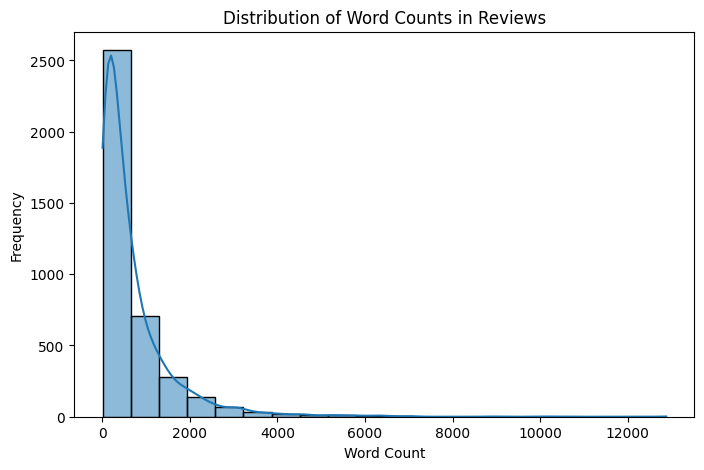

In [130]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Word Count'], bins=20, kde=True)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Reviews')
plt.show()

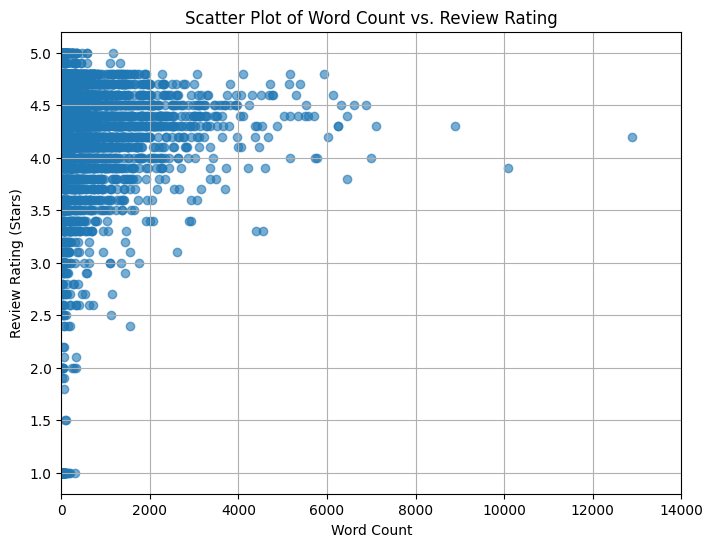

In [131]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Word Count'], df['Stars'], alpha=0.6)

plt.xlabel('Word Count')
plt.ylabel('Review Rating (Stars)')
plt.title('Scatter Plot of Word Count vs. Review Rating')
plt.xlim(0,14000)

plt.grid(True)
plt.show()

Line Graph of Percentiles for Price of Products & Scatter Plot of Price vs. Reviews Sum Per Product

In [132]:
# Function to convert and handle errors
def convert_to_float(value):
    try:
        # Remove 'S$' and ',' and convert to float
        return float(value.replace('S$', '').replace(',', ''))
    except ValueError:
        return np.nan
    
df['Price2'] = df['Price'].apply(convert_to_float)

In [133]:
df['Reviews Sum Per Product']

0       10
1        9
2       10
3       10
4       10
        ..
3854     8
3855     5
3856     5
3857     8
3858     7
Name: Reviews Sum Per Product, Length: 3859, dtype: int64

In [134]:
df[df.Price2 > 3000]

,ASIN,Product,Category,Price,URL,Stars,Reviews,NLP_Reviews,Embeddings,Summary,Sentiment,Confidence,Reviews Sum Per Product,Word Count,Price2
271,‎G4090SLX24,MSI Gaming GeForce RTX 4090 24GB GDRR6X 384-Bi...,Graphics Cards,"S$3,622.59",https://www.amazon.sg/MSI-GeForce-Lovelace-Arc...,4.5,"[This is a great product, it was pretty easy t...",great product pretty easy install term temp pe...,[-4.55932952e-02 1.92140695e-02 -3.40521894e-...,"This is a great product, it was pretty easy to...",Positive,0.992789,9,1063,3622.59
325,‎B0BGT61797,ASUS ROG Strix GeForce RTX® 4090 OC Edition Ga...,Graphics Cards,"S$3,075.13",https://www.amazon.sg/ASUS-GeForce-Gaming-Grap...,4.6,[This card is very big and heavy. It is longer...,card big heavy long founder addition sure home...,[-8.91168788e-03 1.03519289e-02 1.22105768e-...,The card is very powerful and better at mainta...,Positive,0.971897,9,1024,3075.13
388,‎B0BHMGBL32,ASUS TUF Gaming GeForce RTX 4090 Graphics Card...,Graphics Cards,"S$3,075.13",https://www.amazon.sg/ASUS-Gaming-GeForce-Grap...,4.5,[Generally I got what I paid for. The card has...,generally pay card work fine far coil whine ma...,[-5.60657084e-02 -2.69399937e-02 -5.52815609e-...,"The card has worked fine so far, with some coi...",Positive,0.990682,10,458,3075.13
392,‎B0BG93V9GW,PNY GeForce RTX™ 4090 24GB XLR8 Gaming VERTO E...,Graphics Cards,"S$9,078.84",https://www.amazon.sg/PNY-GeForce-Gaming-EPIC-...,4.5,[I play games and edit videos for YouTube. I w...,play game edit video youtube want upgrade grap...,[-2.59819347e-02 -3.30930352e-02 -3.49479280e-...,"The price is high, but this is definitely not ...",Positive,0.984238,8,826,9078.84
623,‎B09PRVGV1V,"VISION COMPUTERS, INC. PNY RTX A4500 20GB GDDR...",Graphics Cards,"S$4,012.72",https://www.amazon.sg/VISION-COMPUTERS-INC-A45...,4.3,[Very good. maybe not good for games but provi...,good maybe good game provide fully hardware su...,[-9.55720711e-03 9.64412838e-03 -3.67455259e-...,This card is unbelievably efficient and powerf...,Positive,0.990172,6,439,4012.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,‎B08PFGDSRZ,"Asus TUF 15.6-inch FHD Gaming Laptop, AMD Quad...",Laptops,"S$3,696.68",https://www.amazon.sg/Asus-TUF-15-6-inch-Lapto...,4.6,[I purchased this laptop to replace a differen...,purchase laptop replace different constantly i...,[-1.71420090e-02 -4.79923189e-02 8.08791351e-...,"The screen is ok, 1080p is not that bad and it...",Positive,0.971202,10,1123,3696.68
2279,‎B07V7GZ2D6,"OMEN by HP 2019 15-inch Gaming Laptop, 9th Gen...",Laptops,"S$6,263.02",https://www.amazon.sg/HP-15-inch-i7-9750H-Soli...,4.1,[RGB keyboard: YES (For everyone's information...,rgb keyboard yes information light changeablep...,[-5.07010557e-02 -4.24790047e-02 2.95209419e-...,Using this laptop for now as a browsing laptop...,Positive,0.977680,8,862,6263.02
2328,B07FP29446,ASUS ZenBook Pro 15.6 Inch Full HD Touch Lapto...,Laptops,"S$3,706.85",https://www.amazon.sg/ASUS-ZenBook-Laptop-i7-7...,4.6,[This is a great laptop just a few minor thing...,great laptop minor thing starsthe usb plugins ...,[-4.23077680e-02 2.39853915e-02 6.14119554e-...,This is a great laptop just a few minor things...,Positive,0.990759,2,783,3706.85
2418,‎B0BBHD5D8Y,"AMD Ryzen™ 9 7950X 16-Core, 32-Thread Unlocked...",Processors,"S$4,399.00",https://www.amazon.sg/AMD-7950X-32-Thread-Unlo...,4.6,[What I like to do is run CPU intensive things...,like run cpu intensive thing background play g...,[ 7.71919498e-03 5.42468624e-03 -6.43123360e-...,The 7950x3D was on sale for what I bought this...,Positive,0.989643,8,638,4399.00


In [135]:
df.Price2.quantile([0, 0.25, 0.5, 0.75, 1])

0.00       8.990
0.25     121.945
0.50     348.420
0.75     794.700
1.00    9078.840
Name: Price2, dtype: float64

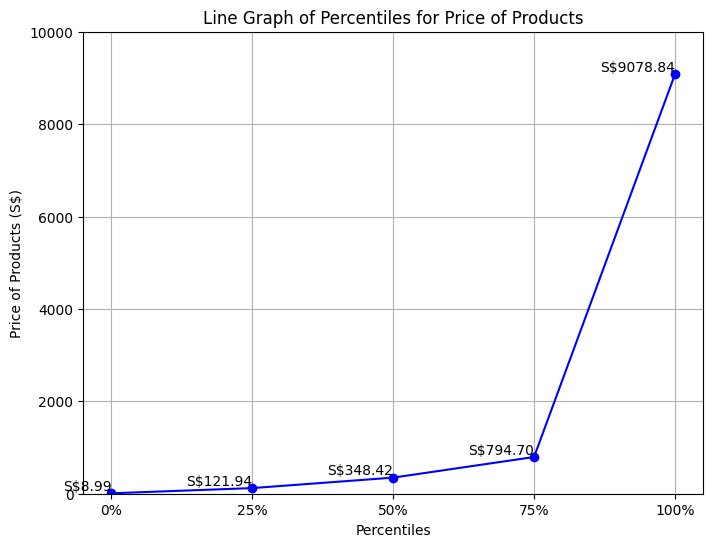

In [136]:
percentiles = df['Price2'].quantile([0, 0.25, 0.5, 0.75, 1])

# Create a line graph
plt.figure(figsize=(8, 6))
plt.plot(percentiles.index, percentiles.values, marker='o', linestyle='-', color='b')

# Customize labels and title
plt.xticks(percentiles.index, ['0%', '25%', '50%', '75%', '100%'])
plt.xlabel('Percentiles')
plt.ylabel('Price of Products (S$)')
plt.title('Line Graph of Percentiles for Price of Products')
plt.ylim(0,10000)

# Annotate the values on the graph
for x, y in zip(percentiles.index, percentiles.values):
    plt.text(x, y, f'S${y:.2f}', ha='right', va='bottom')

# Display the plot
plt.grid(True)
plt.show()

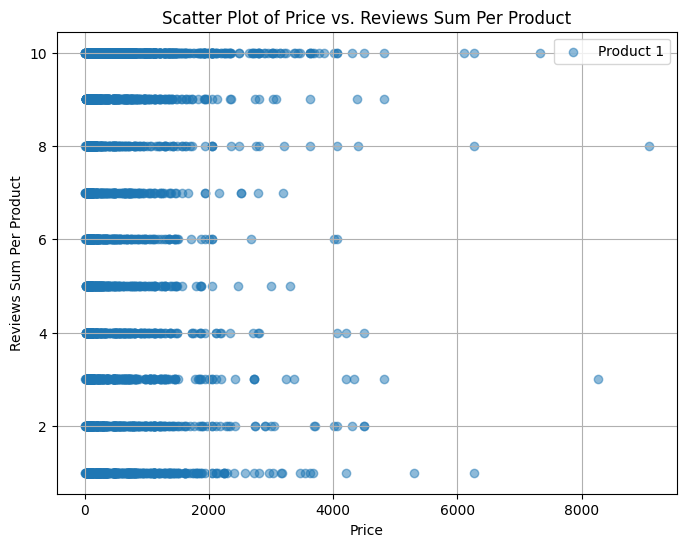

In [137]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Price2'], df['Reviews Sum Per Product'], alpha=0.5, label='Product 1')

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Reviews Sum Per Product')
plt.title('Scatter Plot of Price vs. Reviews Sum Per Product')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

Distribution of NLP Review Lengths & Distribution of Summary Lengths

In [138]:
df['Review Length'] = df['NLP_Reviews'].apply(len)

# Calculate quantiles
quantiles = df['Review Length'].quantile([0, 0.25, 0.5, 0.75, 1])

# Print quantiles
print(quantiles)

0.00        9.0
0.25      412.0
0.50     1085.0
0.75     2409.5
1.00    38329.0
Name: Review Length, dtype: float64


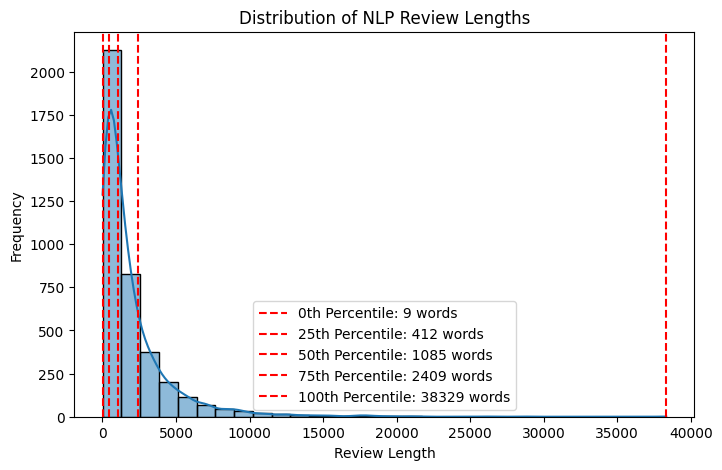

In [139]:
# Calculate the length of each review
df['Review Length'] = df['NLP_Reviews'].apply(len)

# Calculate quantiles
quantiles = df['Review Length'].quantile([0, 0.25, 0.5, 0.75, 1])

# Plot a histogram of review lengths
plt.figure(figsize=(8, 5))
sns.histplot(df['Review Length'], bins=30, kde=True)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of NLP Review Lengths')

# Add vertical lines for quantiles
percentiles = [0, 25, 50, 75, 100]  # The percentiles you want to label
for percentile, quantile in zip(percentiles, quantiles):
    plt.axvline(quantile, color='red', linestyle='--', label=f'{percentile}th Percentile: {int(quantile)} words')

plt.legend()
plt.show()

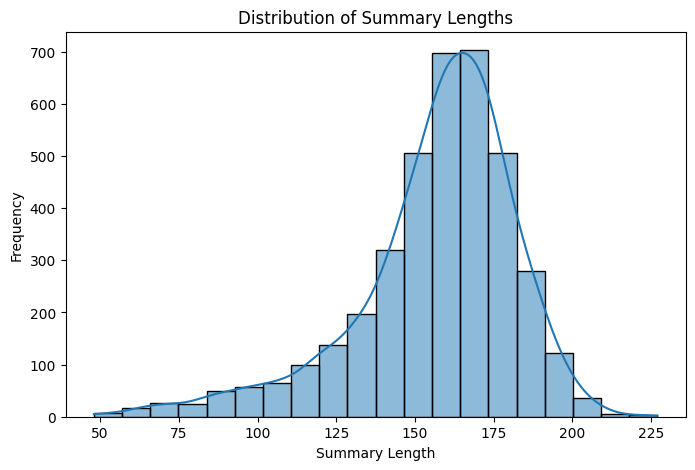

In [140]:
# Calculate the length of each summary
df['Summary Length'] = df['Summary'].apply(len)

# Plot a histogram of summary lengths
plt.figure(figsize=(8, 5))
sns.histplot(df['Summary Length'], bins=20, kde=True)
plt.xlabel('Summary Length')
plt.ylabel('Frequency')
plt.title('Distribution of Summary Lengths')
plt.show()